In [26]:
import pandas as pd
import numpy as np

from sklearn import linear_model

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

data = pd.read_csv("model2.csv")


#merge
x = data.iloc[:,0:7].values
y = data.iloc[:,7:].values


#train&split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)


scores = list() # for accuracy scores

<AxesSubplot:>

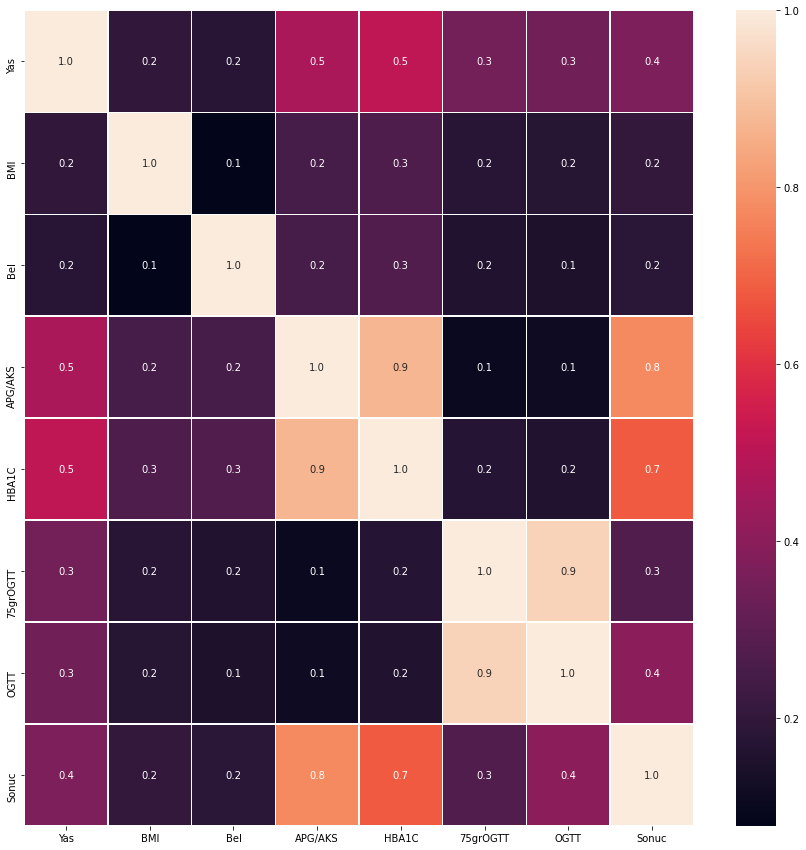

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:  1.0min finished


Logistic Regression Acc:  0.9450757575757576
Best Estimators:  LogisticRegression(C=1438.44988828766, penalty='l1', random_state=42,
                   solver='liblinear')
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        59
     Class 1       0.95      0.93      0.94       151
     Class 2       0.84      0.92      0.88        64
     Class 3       0.86      0.94      0.90        53
     Class 4       0.98      0.85      0.91        65
     Class 5       0.99      0.99      0.99       136

    accuracy                           0.95       528
   macro avg       0.94      0.94      0.94       528
weighted avg       0.95      0.95      0.95       528



<AxesSubplot:>

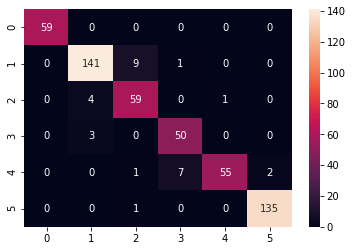

In [30]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

params = {'C': np.logspace(-4, 4, 20),
         'penalty': ['l1', 'l2'],
         'solver': ['lbfgs', 'liblinear']}
gs_lr = GridSearchCV(LogisticRegression(random_state=42), params, verbose=1, cv=10)
grid_search = gs_lr.fit(X_train, y_train)
lr = LogisticRegression(C=grid_search.best_params_['C'],
                                    penalty=grid_search.best_params_['penalty'],
                                    solver=grid_search.best_params_['solver'])
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred.round())
print("Logistic Regression Acc: ", acc_lr)
print("Best Estimators: ", grid_search.best_estimator_)
scores.append(acc_lr)

target_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']
print(classification_report(y_true=y_test, y_pred=y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

KNN acc:  0.9488636363636364
Best Estimators:  KNeighborsClassifier(metric='manhattan', n_neighbors=19, weights='distance')
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        59
     Class 1       0.94      1.00      0.97       151
     Class 2       0.96      0.78      0.86        64
     Class 3       0.90      0.98      0.94        53
     Class 4       0.87      0.89      0.88        65
     Class 5       1.00      0.96      0.98       136

    accuracy                           0.95       528
   macro avg       0.94      0.94      0.94       528
weighted avg       0.95      0.95      0.95       528



<AxesSubplot:>

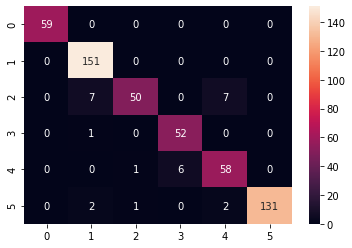

In [31]:
#k Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

params = {'n_neighbors': np.arange(1,50),
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan', 'minkowski']} 
gs_knn = GridSearchCV(KNeighborsClassifier(),
                            params,
                            cv = 4,
                            n_jobs = -1)
grid_search = gs_knn.fit(X_train, y_train)

knn = KNeighborsClassifier(metric=grid_search.best_params_['metric'],
                                        n_neighbors=grid_search.best_params_['n_neighbors'],
                                        weights=grid_search.best_params_['weights'])
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred.round())
print("KNN acc: ", acc_knn)
print("Best Estimators: ", grid_search.best_estimator_)
scores.append(acc_knn)

target_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']
print(classification_report(y_true=y_test, y_pred=y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

SVC Acc:  0.990530303030303
Best Estimators:  SVC(C=4, kernel='linear', random_state=0)
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        59
     Class 1       1.00      1.00      1.00       151
     Class 2       0.97      0.98      0.98        64
     Class 3       1.00      1.00      1.00        53
     Class 4       0.97      0.97      0.97        65
     Class 5       0.99      0.99      0.99       136

    accuracy                           0.99       528
   macro avg       0.99      0.99      0.99       528
weighted avg       0.99      0.99      0.99       528



<AxesSubplot:>

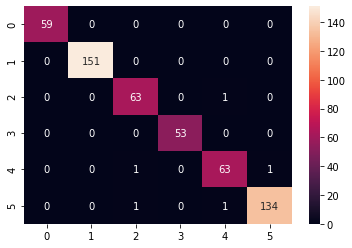

In [7]:
#SVC
from sklearn.svm import SVC

params = [{'C': [1, 2, 3, 4, 5], 'kernel': ['linear'], 'gamma': ['scale', 'auto']},
        {'C': [1, 2, 3, 4, 5], 'kernel': ['rbf'], 'gamma': ['scale', 'auto']},
        {'C': [1, 2, 3, 4, 5], 'kernel': ['sigmoid'], 'gamma': ['scale', 'auto']}]

classifier = SVC(random_state = 0)
gs = GridSearchCV(estimator = classifier,
                    param_grid = params,
                    cv = 10,
                    n_jobs = -1)

grid_search = gs.fit(X_train, y_train)

svc = SVC(C=grid_search.best_params_["C"],
                kernel=grid_search.best_params_['kernel'],
                gamma=grid_search.best_params_['gamma'])

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = accuracy_score(y_test, y_pred.round())
print("SVC Acc: ", acc_svc)
print("Best Estimators: ", grid_search.best_estimator_)
scores.append(acc_svc)

target_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']
print(classification_report(y_true=y_test, y_pred=y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

Fitting 3 folds for each of 588 candidates, totalling 1764 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Decision Tree acc:  1.0
Best Estimators:  DecisionTreeClassifier(max_leaf_nodes=9, random_state=42)
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        59
     Class 1       1.00      1.00      1.00       151
     Class 2       1.00      1.00      1.00        64
     Class 3       1.00      1.00      1.00        53
     Class 4       1.00      1.00      1.00        65
     Class 5       1.00      1.00      1.00       136

    accuracy                           1.00       528
   macro avg       1.00      1.00      1.00       528
weighted avg       1.00      1.00      1.00       528



[Parallel(n_jobs=1)]: Done 1764 out of 1764 | elapsed:    3.9s finished


<AxesSubplot:>

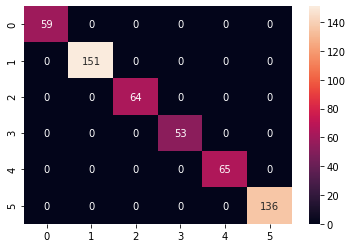

In [8]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

params = {'criterion': ['gini', 'entropy'],
            'max_leaf_nodes': list(range(2, 100)),
            'min_samples_split': [2, 3, 4]}
gs_dtc = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)


grid_search = gs_dtc.fit(X_train, y_train)

dtc = DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'],
                                    max_leaf_nodes=grid_search.best_params_['max_leaf_nodes'],
                                    min_samples_split=grid_search.best_params_['min_samples_split'])
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred.round())
print("Decision Tree acc: ", acc_dt)
print("Best Estimators: ", grid_search.best_estimator_)
scores.append(acc_dt)

target_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']
print(classification_report(y_true=y_test, y_pred=y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

Gaussian Naive Bayes Acc:  0.7064393939393939
Best Estimators:  DecisionTreeClassifier(max_leaf_nodes=9, random_state=42)
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        59
     Class 1       1.00      0.50      0.67       151
     Class 2       0.46      0.98      0.63        64
     Class 3       0.82      1.00      0.90        53
     Class 4       0.47      0.97      0.64        65
     Class 5       1.00      0.43      0.61       136

    accuracy                           0.71       528
   macro avg       0.79      0.82      0.74       528
weighted avg       0.85      0.71      0.70       528



<AxesSubplot:>

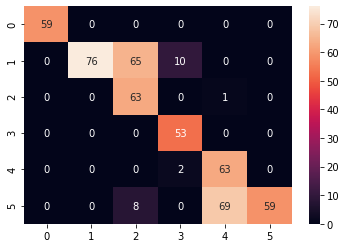

In [9]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred.round())
print("Gaussian Naive Bayes Acc: ", acc_nb)
print("Best Estimators: ", grid_search.best_estimator_)
scores.append(acc_nb)

target_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']
print(classification_report(y_true=y_test, y_pred=y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

Fitting 10 folds for each of 125 candidates, totalling 1250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1250 out of 1250 | elapsed:  2.0min finished


Random Forest Acc:  0.9981060606060606
Best Estimators:  RandomForestClassifier(max_depth=6, min_samples_split=9, n_estimators=30,
                       random_state=42)
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        59
     Class 1       1.00      1.00      1.00       151
     Class 2       0.98      1.00      0.99        64
     Class 3       1.00      1.00      1.00        53
     Class 4       1.00      1.00      1.00        65
     Class 5       1.00      0.99      1.00       136

    accuracy                           1.00       528
   macro avg       1.00      1.00      1.00       528
weighted avg       1.00      1.00      1.00       528



<AxesSubplot:>

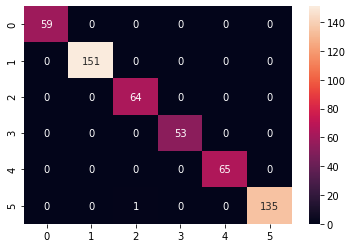

In [10]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

params = {'n_estimators': [30, 40, 50, 60, 70],
          'max_depth': [6, 8, 10, 12, 14],
         'min_samples_split': [9, 11, 13, 15, 17]}
gs_random_forest = GridSearchCV(RandomForestClassifier(random_state=42), params, verbose=1, cv=10)
grid_search = gs_random_forest.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                                max_depth=grid_search.best_params_['max_depth'],
                                min_samples_split=grid_search.best_params_['min_samples_split'],
                                random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred.round())
print("Random Forest Acc: ", acc_rf)
print("Best Estimators: ", grid_search.best_estimator_)
scores.append(acc_rf)

target_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']
print(classification_report(y_true=y_test, y_pred=y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [11]:
models = ["LogisticRegressionModel", "KnnModel",
            "SvcModel", "DecisionTreeModel",
            "NaiveBayesModel", "RandomForestModel"]
result = zip(models, scores)
result_set = set(result)
print(result_set)

{('LogisticRegressionModel', 0.9450757575757576), ('NaiveBayesModel', 0.7064393939393939), ('SvcModel', 0.990530303030303), ('KnnModel', 0.9488636363636364), ('DecisionTreeModel', 1.0), ('RandomForestModel', 0.9981060606060606)}


# Feature Selection

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
X_train, X_test, y_train, y_test = train_test_split(x_col, y_col, test_size = 0.33, random_state = 42)
select_feature = SelectKBest(chi2, k=5).fit(X_train, y_train)

In [19]:
x_col = data.iloc[:,0:7]
y_col = data.iloc[:,7:]

print('Score list:', select_feature.scores_)
print('Feature list:', X_train.columns)

Score list: [ 1890.0323312    274.80048084   330.01422215 22312.02509147
  1071.06806734   200.06304114 31249.09520162]
Feature list: Index(['Yas', 'BMI', 'Bel', 'APG/AKS', 'HBA1C', '75grOGTT', 'OGTT'], dtype='object')


Accuracy is:  1.0


<AxesSubplot:>

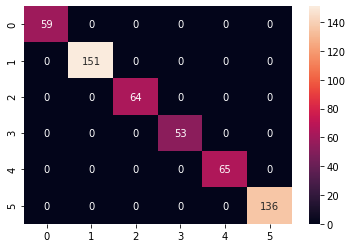

In [21]:
X_train_2 = select_feature.transform(X_train)
X_test_2 = select_feature.transform(X_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(X_train_2, y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(X_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(X_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

# Feature Extraction

Text(0, 0.5, 'explained_variance_ratio_')

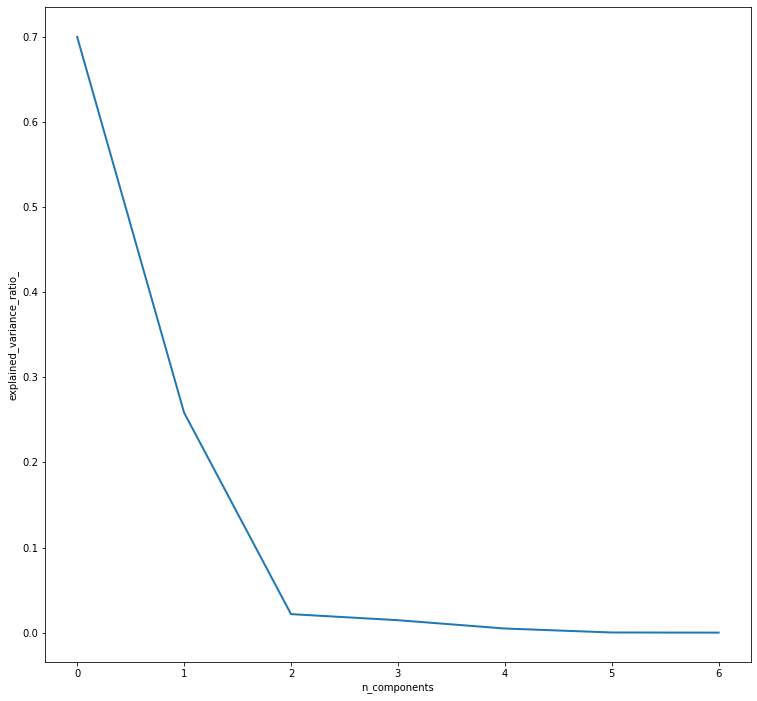

In [32]:
# split data train 67 % and test 33 %

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')